In [8]:
import sys, os
sys.path.append(os.path.abspath('../'))

In [ ]:
from matplotlib import pyplot as plt
from model import LLM, LLMconfig
import torch
# ckpt = torch.load('llm_model.pt', weights_only=False)
dense = torch.load('dense.pt', weights_only=False)
moe = torch.load('moe.pt', weights_only=False)
iters = 5000
eval_int = 100

: 

In [ ]:
dense_replica = LLM(dense['config'])
moe_replica = LLM(moe['config'])
print(f"Parameters (total/active) in Dense model: {dense_replica.get_num_params()}")
print(f"Parameters (total/active) in MoE model: {moe_replica.get_num_params()}")

Parameters (total/active) in Dense model: (28284672, 28284672)
Parameters (total/active) in MoE model: (40115712, 25959936)


: 

In [ ]:
dense_iters, dense_train_losses = range(iters)[eval_int:] , dense['losses']['train'][eval_int:-1]
dense_val_iters, dense_valrun_val_losses, dense_valrun_train_losses = range(0,iters,eval_int), dense['losses']['valrun_val'], dense['losses']['valrun_train']
print((len(dense_iters), len(dense_train_losses)), (len(dense_val_iters), len(dense_valrun_val_losses), len(dense_valrun_train_losses)))


moe_iters, moe_train_losses = range(iters)[eval_int:] , moe['losses']['train'][eval_int:-1]
moe_val_iters, moe_valrun_val_losses, moe_valrun_train_losses = range(0,iters,eval_int), moe['losses']['valrun_val'], moe['losses']['valrun_train']
print((len(moe_iters), len(moe_train_losses)), (len(moe_val_iters), len(moe_valrun_val_losses), len(moe_valrun_train_losses)))

(4900, 4900) (50, 50, 50)
(4900, 4900) (50, 50, 50)


: 

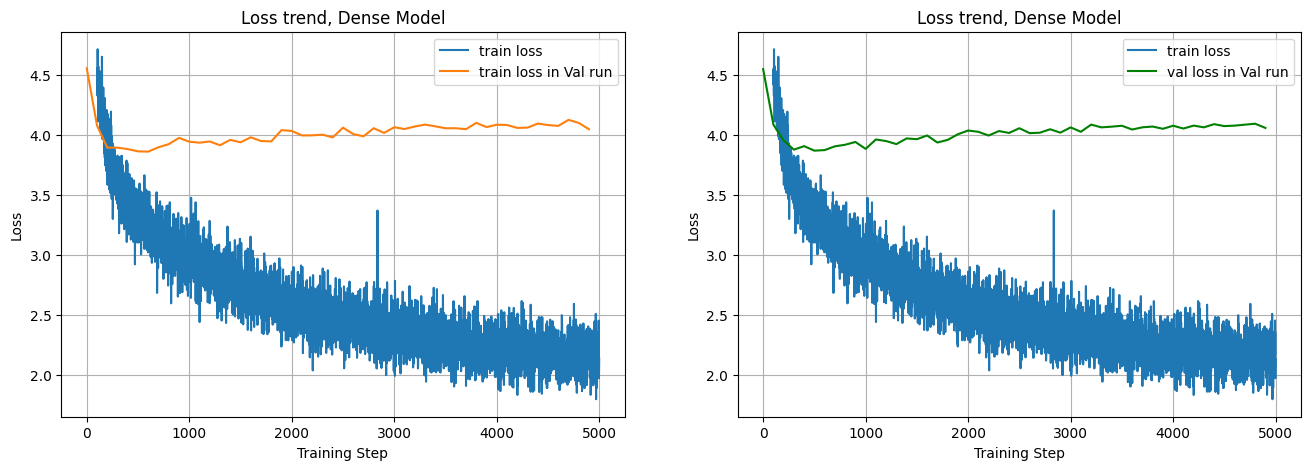

: 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(dense_iters, dense_train_losses, label='train loss')
axs[0].plot(dense_val_iters, dense_valrun_train_losses, label='train loss in Val run')


axs[1].plot(dense_iters, dense_train_losses, label='train loss')
axs[1].plot(dense_val_iters, dense_valrun_val_losses, label='val loss in Val run', color='green')

for i in (0,1):
	axs[i].grid(True)
	axs[i].set_xlabel('Training Step')
	axs[i].set_ylabel('Loss')
	axs[i].set_title("Loss trend, Dense Model")
	axs[i].legend()

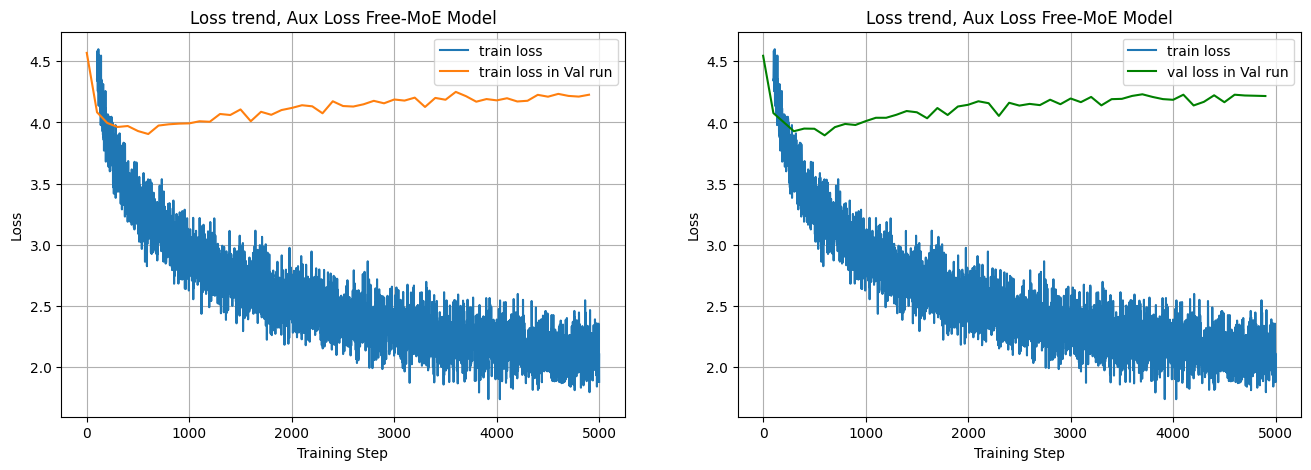

: 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(moe_iters, moe_train_losses, label='train loss')
axs[0].plot(moe_val_iters, moe_valrun_train_losses, label='train loss in Val run')


axs[1].plot(moe_iters, moe_train_losses, label='train loss')
axs[1].plot(moe_val_iters, moe_valrun_val_losses, label='val loss in Val run', color='green')

for i in (0,1):
	axs[i].grid(True)
	axs[i].set_xlabel('Training Step')
	axs[i].set_ylabel('Loss')
	axs[i].set_title("Loss trend, Aux Loss Free-MoE Model")
	axs[i].legend()

: 